In [1]:
from Unified_Algorithm import *
import time
import secrets
import matplotlib.pyplot as plt

In [2]:
data = ["Hello, How are you?!"*10]
secret_key = "".join(secrets.choice("0123456789ABCDEF") for _ in range(40))
print(f"Your are using the secret key: {secret_key}")
print(f"The original message is: {data[0]}\n")
for index, d in enumerate(data):
    encryptor = Encryption(d, secret_key)
    t0 = time.perf_counter()
    cipher_text = encryptor.encrypt()
    t1 = time.perf_counter()
    decryptor = Decryption(cipher_text=cipher_text, secret_key=secret_key, data_type="text")
    t2 = time.perf_counter()
    plain_text = decryptor.decrypt()
    t3 = time.perf_counter()
    print(f"Encryption Benchmark: {t1 - t0:.10f}s")
    print(f"Decryption Benchmark: {t3 - t2:.10f}s")
    print(f"Benchmark for string of length: {len(d)}")
    print(f"Benchmark for iterations: {encryptor.iteration_number}")
    print(f"Parameters used: (r, x0, base) = ({encryptor.r}, {encryptor.x0}, {encryptor.base})\n")
    print(f"Decrypted Message is: {plain_text}")

Your are using the secret key: 8C6C712252945A5F0CE9D011BB25C4853F109DBD
The original message is: Hello, How are you?!Hello, How are you?!Hello, How are you?!Hello, How are you?!Hello, How are you?!Hello, How are you?!Hello, How are you?!Hello, How are you?!Hello, How are you?!Hello, How are you?!

Encryption Benchmark: 0.9370879000s
Decryption Benchmark: 0.4944639000s
Benchmark for string of length: 200
Benchmark for iterations: 2
Parameters used: (r, x0, base) = (3.863663712252, 0.94541596063859, 7.4011525225634)

Decrypted Message is: Hello, How are you?!Hello, How are you?!Hello, How are you?!Hello, How are you?!Hello, How are you?!Hello, How are you?!Hello, How are you?!Hello, How are you?!Hello, How are you?!Hello, How are you?!


(512, 512)


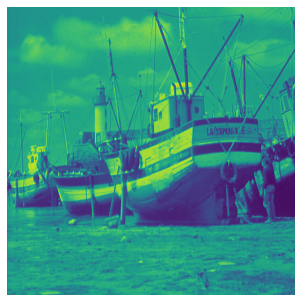

In [3]:
img = plt.imread('standard_test_images/boat512.tiff')
print(img.shape)
fig = plt.figure(frameon=False, facecolor='white')
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(img)
plt.show()

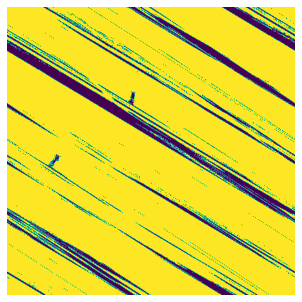

In [4]:
img = plt.imread('standard_test_images/boat512.tiff')
encryptor = Encryption(img, secret_key=secret_key)
cipher_text = encryptor.encrypt()
fig = plt.figure(frameon=False, facecolor='white')
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(cipher_text.astype('uint64'))
plt.show()


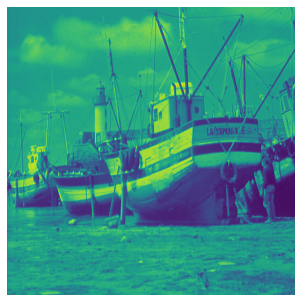

In [5]:
decryptor = Decryption(cipher_text=cipher_text, secret_key=secret_key, data_type="image")
plain_text = decryptor.decrypt()
fig = plt.figure(frameon=False, facecolor='white')
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(plain_text)
plt.show()

Text(0, 0.5, 'Value of Lyapunov exponent')

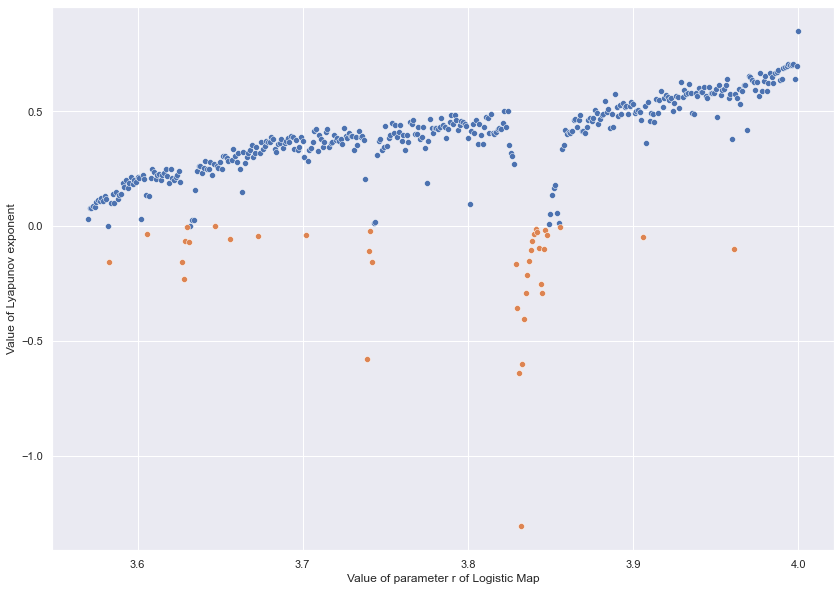

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
result = []
proper_r = []
proper_lambdas = []
improper_r = []
improper_lambdas = []

# define range of r 
rvalues = np.arange(3.57, 4, 0.001)

# loop through r
for r in rvalues:
    x = 0.5
    result = []
    # iterate system 100 times
    for _ in range(100):
        x = r*x*(1-x)
        # calculate log of the absolute of the derivative
        result.append(np.log(abs(r - 2*r*x)))
    # take average
    av = np.mean(result)
    if av > 0:
        proper_lambdas.append(av)
        proper_r.append(r)
    elif av <= 0:
        improper_lambdas.append(av)
        improper_r.append(r)

fig = plt.figure(figsize=(14,10))
sns.scatterplot(x=proper_r, y=proper_lambdas)
sns.scatterplot(x=improper_r, y=improper_lambdas)
plt.xlabel('Value of parameter r of Logistic Map')
plt.ylabel('Value of Lyapunov exponent')